# Grad stats 2 problem set 1

## 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [1]:
cd C:\Users\Jovis\Desktop\gradstats2
copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv" agilepredatorsdata20191116.csv
import delimited using "agilepredatorsdata20191116.csv", clear


C:\Users\Jovis\Desktop\gradstats2


(52 vars, 205,262 obs)


## 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [2]:
ds, varwidth(20)

unitid                idx_sfa               ipo                   grtotltchrt2yr        pe_ind                grad_rate_150_p2yr_w  pctchrtgrbkaat_w      pct2yrchrtgrwhitt_w   not_pe_po             dist_white_share_w    poswitcherall
year                  idx_gr                owner_pe              grtotltallgradchrt    po_ind                grad_rate_150_p4yr_w  pctchrtgrwhitt_w      pct4yrchrtgrbkaat_w   peacqu                dist_hisp_share_w     poswitchsystemall
iclevel               selective             online                all_under             inst_name_new         all_under_w           pctchrtgrhispt_w      pct4yrchrtgrhispt_w   poacqu                dist_fed_grant_pct_w
idx_ef                systemid              total_enrollment      chain                 loan_amount_borrow~w  tuitionall_c_w        pct2yrchrtgrbkaat_w   pct4yrchrtgrwhitt_w   dist_pell_s           peswitcherall
idx_f                 systemnm              grtotltchrt4yr        investevent           grad_rate

## 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [3]:
%help summarize

This front-end cannot display HTML help.

## 4. Use the **"drop"** command with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]
[The data set provided includes all types of schools such as community colleges, state, and non-profit schools. Since we are only intrested in for-profit schools, the other types of schools need to be dropped from the data set.]

In [4]:
tab owner_pe
tab owner_pe, nol m
des owner_pe
drop if owner_pe=="State"
drop if owner_pe=="Community"
drop if owner_pe=="Non-profit"
tab owner_pe

tab year
tab year, nol m
keep if year==2014


sum dist_pell_s, detail



       owner_pe |      Freq.     Percent        Cum.
----------------+-----------------------------------
      Community |     41,264       20.10       20.10
     Non-profit |     66,188       32.25       52.35
 Private equity |      6,799        3.31       55.66
 Privately held |     59,220       28.85       84.51
Publicly traded |     11,559        5.63       90.14
          State |     20,232        9.86      100.00
----------------+-----------------------------------
          Total |    205,262      100.00


       owner_pe |      Freq.     Percent        Cum.
----------------+-----------------------------------
      Community |     41,264       20.10       20.10
     Non-profit |     66,188       32.25       52.35
 Private equity |      6,799        3.31       55.66
 Privately held |     59,220       28.85       84.51
Publicly traded |     11,559        5.63       90.14
          State |     20,232        9.86      100.00
----------------+-----------------------------------
 

## 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]
[The histogram showcasing the variable dist_pell_s is right skewed. It also seems to have an outlier of 17901.14. The boxplot is showcasing the IQR, which shows that the median is skewed to the right.]


(bin=35, start=0, width=511.46116)


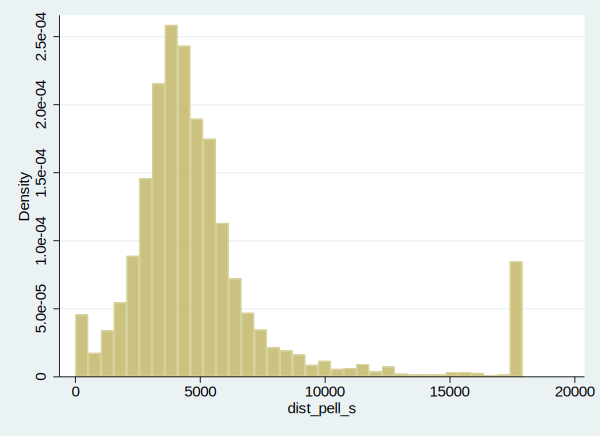

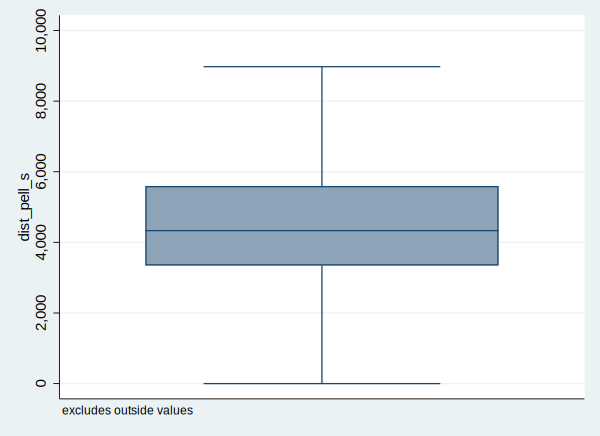

In [5]:
histogram dist_pell_s  
graph box dist_pell_s, nooutsides

## 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]
1. [Based on the theory, I would hypothesize that for-profit schools would be less likely to offer 4-year or lower degrees since students have poor graduation rates.]
2. [The dependent variable would be a school that offers 4-year or lower degrees. This is the dependent variable becuase it does change. The independent variable would be for-profit college ownership because it's the variable that does not change.]

## 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [6]:
des iclevel owner_pe
tab iclevel
tab owner_pe


encode iclevel, gen(iclevel2)
encode owner_pe, gen(owner_pe2)
des iclevel2 owner_pe2

tab iclevel2 owner_pe2




              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
iclevel         str35   %35s                  
owner_pe        str15   %15s                  


                            iclevel |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
   At least 2 but less than 4 years |      1,060       29.11       29.11
                 Four or more years |        790       21.70       50.81
Less than 2 years (below associate) |      1,791       49.19      100.00
------------------------------------+-----------------------------------
                              Total |      3,641      100.00


       owner_pe |      Freq.     Percent   

## 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]

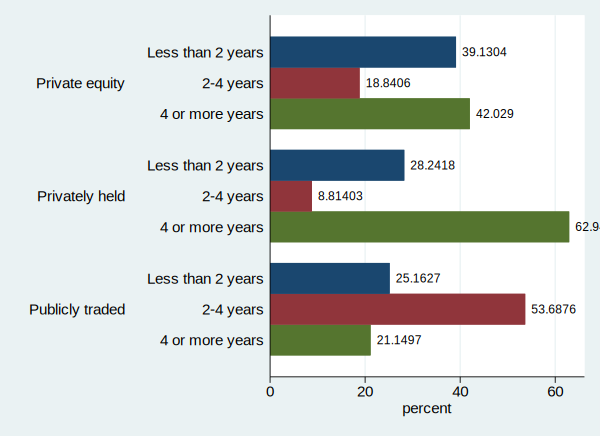

In [7]:
xi i.iclevel2, noomit

graph hbar _Iiclevel2_* , over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))

## 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?
[The bivariate frequency table and the bar graph show that private equity and privately held schools are less likely to offer 2-4 year degrees but more likely to offer less than 2 years and 4 or more years degrees. On the other hand publicly traded schools are more likely to offer 2-4 year degrees and less likely to offer less than 2 years or 4 or more years degrees.]

## 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]
[In examining the bargraphs, it looks like schools not operated by chains offer 4 or more years degrees, while schools operated by chains have a similiar percentage among the degrees they offer. There are more private equity schools not operated by chains. There are more privatly held schools operated by chains and there are more publicly traded schools that are not operated by chains.]

[record your interpretation here]



      chain |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,754       48.17       48.17
          1 |      1,887       51.83      100.00
------------+-----------------------------------
      Total |      3,641      100.00




             chain |      Freq.     Percent        Cum.
-------------------+-----------------------------------
         No chains |      1,754       48.17       48.17
Operated by chains |      1,887       51.83      100.00
-------------------+-----------------------------------
             Total |      3,641      100.00


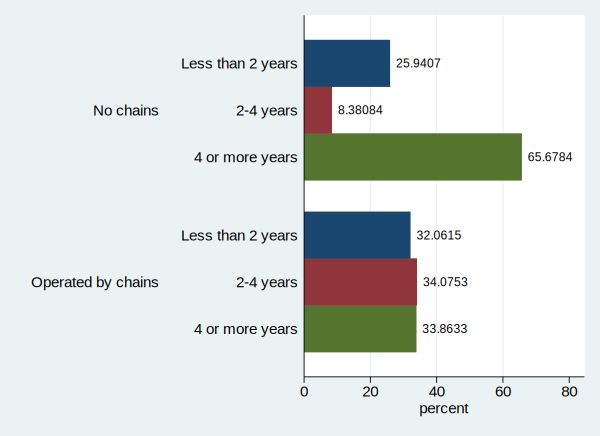







                   |            owner_pe2
             chain | Private e  Privately  Publicly  |     Total
-------------------+---------------------------------+----------
         No chains |        29      1,721          4 |     1,754 
Operated by chains |       523        446        918 |     1,887 
-------------------+---------------------------------+----------
             Total |       552      2,167        922 |     3,641 


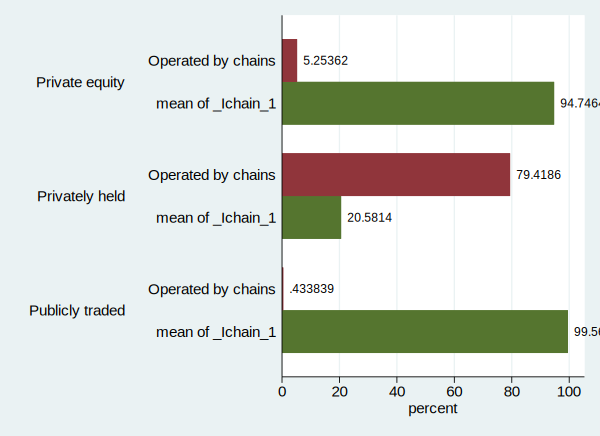

In [8]:
tab chain, nol m
label define chain 0 "No chains" 1 "Operated by chains"
label values chain chain
tab chain



xi i.iclevel2, noomit
graph hbar _Iiclevel2_*, over(chain) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))

tab chain owner_pe2

xi i.chain, noomit
graph hbar _Ichain_*, over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel (0 "No chains" 1 "Operated by chains"))

## 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort iclevel:" before the "tab command" and 2) adding a "by(iclevel)" specification to the end of the graph command. Interpret the results [5 pts]
[The graph shows that schools that are label as private equity and are not operated by chains offer more less than 2 years degrees versus private equity schools operated by chains. Privately held schools that are not run under chains offer more less than 2 years degrees versus privately held schools operated by chains. Lastly publicly traded schools that are not operated by chains offer more less than 2 years degrees versus schools that are not operated by chains. ]



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> chain = No chains

                      |            owner_pe2
             iclevel2 | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less t |        11        444          0 |       455 
   Four or more years |        14        129          4 |       147 
Less than 2 years (be |         4      1,148          0 |     1,152 
----------------------+---------------------------------+----------
                Total |        29      1,721          4 |     1,754 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

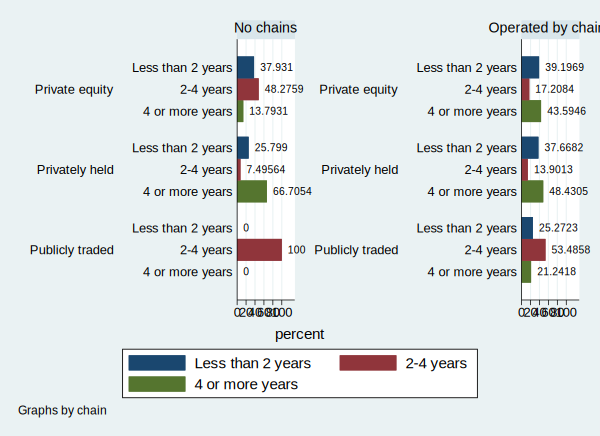

In [9]:
bysort chain:tab iclevel2 owner_pe2
xi i.iclevel2, noomit
graph hbar _Iiclevel2_*, over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years")) by(chain)
